# Data Collection

Original Question: <br>
Is regular season series record indicative of postseason success?

## Import

In [50]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup, NavigableString
import sys
import matplotlib.pyplot as plt
import seaborn as sns

## Scraper

In [1]:
headers = {'user-agent': 'MLeroy, UVA MSDS Student (zuf9mc@virginia.edu)'}
url_string1 = 'https://www.baseball-reference.com/leagues/majors/'
url_string2 = '-schedule.shtml'
year_list = range(1900, 2022, 1)
urllist = [url_string1 + str(x) + url_string2 for x in year_list]
urllist


['https://www.baseball-reference.com/leagues/majors/1900-schedule.shtml',
 'https://www.baseball-reference.com/leagues/majors/1901-schedule.shtml',
 'https://www.baseball-reference.com/leagues/majors/1902-schedule.shtml',
 'https://www.baseball-reference.com/leagues/majors/1903-schedule.shtml',
 'https://www.baseball-reference.com/leagues/majors/1904-schedule.shtml',
 'https://www.baseball-reference.com/leagues/majors/1905-schedule.shtml',
 'https://www.baseball-reference.com/leagues/majors/1906-schedule.shtml',
 'https://www.baseball-reference.com/leagues/majors/1907-schedule.shtml',
 'https://www.baseball-reference.com/leagues/majors/1908-schedule.shtml',
 'https://www.baseball-reference.com/leagues/majors/1909-schedule.shtml',
 'https://www.baseball-reference.com/leagues/majors/1910-schedule.shtml',
 'https://www.baseball-reference.com/leagues/majors/1911-schedule.shtml',
 'https://www.baseball-reference.com/leagues/majors/1912-schedule.shtml',
 'https://www.baseball-reference.com/l

In [3]:
#r = requests.get(urllist[1], headers = headers)
#parsed = BeautifulSoup(r.text, 'html')


In [4]:
urllist[94]

'https://www.baseball-reference.com/leagues/majors/1994-schedule.shtml'

In [5]:
PostSeasonMarkerDF = pd.DataFrame(columns = ['PostSeasonStartDate'])
for x in range(len(urllist)):
    r = requests.get(urllist[x], headers = headers)
    parsed = BeautifulSoup(r.text, 'html')
    
    #remove bold tags
    invalid_tags = ['strong']
    for tag in invalid_tags: 
        for match in parsed.findAll(tag):
            match.replaceWithChildren()
            
    #find postseason start dates
    
    if x > 4 and x != 94:
        postseasonmarker = parsed.find_all('h2')[1].find_next('h3').text
        df_length = len(PostSeasonMarkerDF)
        PostSeasonMarkerDF.loc[df_length] = postseasonmarker
        print(postseasonmarker)

Monday, October 9, 1905
Tuesday, October 9, 1906
Tuesday, October 8, 1907
Saturday, October 10, 1908
Friday, October 8, 1909
Monday, October 17, 1910
Saturday, October 14, 1911
Tuesday, October 8, 1912
Tuesday, October 7, 1913
Friday, October 9, 1914
Friday, October 8, 1915
Saturday, October 7, 1916
Saturday, October 6, 1917
Thursday, September 5, 1918
Wednesday, October 1, 1919
Tuesday, October 5, 1920
Wednesday, October 5, 1921
Wednesday, October 4, 1922
Wednesday, October 10, 1923
Saturday, October 4, 1924
Wednesday, October 7, 1925
Saturday, October 2, 1926
Wednesday, October 5, 1927
Thursday, October 4, 1928
Tuesday, October 8, 1929
Wednesday, October 1, 1930
Thursday, October 1, 1931
Wednesday, September 28, 1932
Tuesday, October 3, 1933
Wednesday, October 3, 1934
Wednesday, October 2, 1935
Wednesday, September 30, 1936
Wednesday, October 6, 1937
Wednesday, October 5, 1938
Wednesday, October 4, 1939
Wednesday, October 2, 1940
Wednesday, October 1, 1941
Wednesday, September 30, 19

In [6]:
PostSeasonMarkerDF

,PostSeasonStartDate
0,"Monday, October 9, 1905"
1,"Tuesday, October 9, 1906"
2,"Tuesday, October 8, 1907"
3,"Saturday, October 10, 1908"
4,"Friday, October 8, 1909"
...,...
111,"Tuesday, October 3, 2017"
112,"Tuesday, October 2, 2018"
113,"Tuesday, October 1, 2019"
114,"Tuesday, September 29, 2020"


In [7]:
gameDF = pd.DataFrame()
PostSeasonMarkerDF = pd.DataFrame(columns = ['PostSeasonStartDate'])
for x in range(len(urllist)):
    r = requests.get(urllist[x], headers = headers)
    parsed = BeautifulSoup(r.text, 'html')
    
    #remove bold tags
    invalid_tags = ['strong']
    for tag in invalid_tags: 
        for match in parsed.findAll(tag):
            match.replaceWithChildren()
            
    #find postseason start dates
    
    if x > 4 and x != 94:
        postseasonmarker = parsed.find_all('h2')[1].find_next('h3').text
        df_length = len(PostSeasonMarkerDF)
        PostSeasonMarkerDF.loc[df_length] = postseasonmarker
     
    #collect game info
    game_list = parsed.find_all("p", "game")
    print(game_list[0].a)
    home_team_list = []
    away_team_list = []
    home_team_score_list = []
    away_team_score_list = []
    date_list = []
    for y in range(len(game_list)):
        gamex = game_list[y]
        date = gamex.parent.h3.text
        away_team = gamex.a.text
        away_score = gamex.a.next_sibling
        home_score = gamex.a.next_sibling.next_sibling.next_sibling.next_sibling
        home_team = gamex.a.next_sibling.next_sibling.next_sibling
        home_team_list.append(home_team)
        away_team_list.append(away_team)
        home_team_score_list.append(home_score)
        away_team_score_list.append(away_score)
        date_list.append(date)
    d = {'Home_Team':home_team_list,
            'Home_Team_Score':home_team_score_list,
            'Away_Team':away_team_list, 
            'Away_Team_Score':away_team_score_list, 
            'Date': date_list}
    yearDF = pd.DataFrame(d)
    gameDF = gameDF.append(yearDF)


<a href="/teams/PHI/1900.shtml">Philadelphia Phillies</a>
<a href="/teams/BRO/1901.shtml">Brooklyn Superbas</a>
<a href="/teams/BSN/1902.shtml">Boston Beaneaters</a>
<a href="/teams/PIT/1903.shtml">Pittsburgh Pirates</a>
<a href="/teams/NYG/1904.shtml">New York Giants</a>
<a href="/teams/PHI/1905.shtml">Philadelphia Phillies</a>
<a href="/teams/BSN/1906.shtml">Boston Beaneaters</a>
<a href="/teams/STL/1907.shtml">St. Louis Cardinals</a>
<a href="/teams/WSH/1908.shtml">Washington Senators</a>
<a href="/teams/BOS/1909.shtml">Boston Red Sox</a>
<a href="/teams/NYG/1910.shtml">New York Giants</a>
<a href="/teams/BRO/1911.shtml">Brooklyn Dodgers</a>
<a href="/teams/NYG/1912.shtml">New York Giants</a>
<a href="/teams/PHI/1913.shtml">Philadelphia Phillies</a>
<a href="/teams/BUF/1914.shtml">Buffalo Buffeds</a>
<a href="/teams/NEW/1915.shtml">Newark Pepper</a>
<a href="/teams/PHA/1916.shtml">Philadelphia Athletics</a>
<a href="/teams/PHI/1917.shtml">Philadelphia Phillies</a>
<a href="/teams/PH

In [8]:
gameDF

,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date
0,[Boston Beaneaters],\n (17)\n \n,Philadelphia Phillies,\n (19),"Thursday, April 19, 1900"
1,[Cincinnati Reds],\n (10)\n \n,Chicago Orphans,\n (13),"Thursday, April 19, 1900"
2,[New York Giants],\n (2)\n \n,Brooklyn Superbas,\n (3),"Thursday, April 19, 1900"
3,[St. Louis Cardinals],\n (3),Pittsburgh Pirates,\n (0)\n @\n,"Thursday, April 19, 1900"
4,[New York Giants],\n (12),Brooklyn Superbas,\n (8)\n @\n,"Friday, April 20, 1900"
...,...,...,...,...,...
2461,[Houston Astros],\n (7),Atlanta Braves,\n (2)\n @\n,"Wednesday, October 27, 2021"
2462,[Atlanta Braves],\n (2),Houston Astros,\n (0)\n @\n,"Friday, October 29, 2021"
2463,[Atlanta Braves],\n (3),Houston Astros,\n (2)\n @\n,"Saturday, October 30, 2021"
2464,[Atlanta Braves],\n (5)\n,Houston Astros,\n (9),"Sunday, October 31, 2021"


In [9]:
PostSeasonMarkerDF['PostSeasonStartDate'] = pd.to_datetime(PostSeasonMarkerDF['PostSeasonStartDate'])
PostSeasonMarkerDF['Season'] = pd.DatetimeIndex(PostSeasonMarkerDF['PostSeasonStartDate']).year
PostSeasonMarkerDF = PostSeasonMarkerDF.set_index('Season')


## World Series Scraping

In [10]:
WSChamps = pd.read_csv('WSChamps.csv')

In [11]:
PostSeasonMarkerDF.to_csv('PostSeasonStartDates.csv')

## Initial Cleaning

In [12]:
gameDF_clean = gameDF
gameDF_clean

,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date
0,[Boston Beaneaters],\n (17)\n \n,Philadelphia Phillies,\n (19),"Thursday, April 19, 1900"
1,[Cincinnati Reds],\n (10)\n \n,Chicago Orphans,\n (13),"Thursday, April 19, 1900"
2,[New York Giants],\n (2)\n \n,Brooklyn Superbas,\n (3),"Thursday, April 19, 1900"
3,[St. Louis Cardinals],\n (3),Pittsburgh Pirates,\n (0)\n @\n,"Thursday, April 19, 1900"
4,[New York Giants],\n (12),Brooklyn Superbas,\n (8)\n @\n,"Friday, April 20, 1900"
...,...,...,...,...,...
2461,[Houston Astros],\n (7),Atlanta Braves,\n (2)\n @\n,"Wednesday, October 27, 2021"
2462,[Atlanta Braves],\n (2),Houston Astros,\n (0)\n @\n,"Friday, October 29, 2021"
2463,[Atlanta Braves],\n (3),Houston Astros,\n (2)\n @\n,"Saturday, October 30, 2021"
2464,[Atlanta Braves],\n (5)\n,Houston Astros,\n (9),"Sunday, October 31, 2021"


In [13]:
gameDF_clean['Home_Team'] = gameDF_clean.Home_Team.astype(str)

In [14]:
gameDF_clean

,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date
0,"<a href=""/teams/BSN/1900.shtml"">Boston Beaneat...",\n (17)\n \n,Philadelphia Phillies,\n (19),"Thursday, April 19, 1900"
1,"<a href=""/teams/CIN/1900.shtml"">Cincinnati Red...",\n (10)\n \n,Chicago Orphans,\n (13),"Thursday, April 19, 1900"
2,"<a href=""/teams/NYG/1900.shtml"">New York Giant...",\n (2)\n \n,Brooklyn Superbas,\n (3),"Thursday, April 19, 1900"
3,"<a href=""/teams/STL/1900.shtml"">St. Louis Card...",\n (3),Pittsburgh Pirates,\n (0)\n @\n,"Thursday, April 19, 1900"
4,"<a href=""/teams/NYG/1900.shtml"">New York Giant...",\n (12),Brooklyn Superbas,\n (8)\n @\n,"Friday, April 20, 1900"
...,...,...,...,...,...
2461,"<a href=""/teams/HOU/2021.shtml"">Houston Astros...",\n (7),Atlanta Braves,\n (2)\n @\n,"Wednesday, October 27, 2021"
2462,"<a href=""/teams/ATL/2021.shtml"">Atlanta Braves...",\n (2),Houston Astros,\n (0)\n @\n,"Friday, October 29, 2021"
2463,"<a href=""/teams/ATL/2021.shtml"">Atlanta Braves...",\n (3),Houston Astros,\n (2)\n @\n,"Saturday, October 30, 2021"
2464,"<a href=""/teams/ATL/2021.shtml"">Atlanta Braves...",\n (5)\n,Houston Astros,\n (9),"Sunday, October 31, 2021"


In [15]:
gameDF_clean['Home_Team'] = gameDF_clean.Home_Team.str[32:]

In [16]:
gameDF_clean

,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date
0,Boston Beaneaters</a>,\n (17)\n \n,Philadelphia Phillies,\n (19),"Thursday, April 19, 1900"
1,Cincinnati Reds</a>,\n (10)\n \n,Chicago Orphans,\n (13),"Thursday, April 19, 1900"
2,New York Giants</a>,\n (2)\n \n,Brooklyn Superbas,\n (3),"Thursday, April 19, 1900"
3,St. Louis Cardinals</a>,\n (3),Pittsburgh Pirates,\n (0)\n @\n,"Thursday, April 19, 1900"
4,New York Giants</a>,\n (12),Brooklyn Superbas,\n (8)\n @\n,"Friday, April 20, 1900"
...,...,...,...,...,...
2461,Houston Astros</a>,\n (7),Atlanta Braves,\n (2)\n @\n,"Wednesday, October 27, 2021"
2462,Atlanta Braves</a>,\n (2),Houston Astros,\n (0)\n @\n,"Friday, October 29, 2021"
2463,Atlanta Braves</a>,\n (3),Houston Astros,\n (2)\n @\n,"Saturday, October 30, 2021"
2464,Atlanta Braves</a>,\n (5)\n,Houston Astros,\n (9),"Sunday, October 31, 2021"


In [17]:
gameDF_clean['Home_Team'] = gameDF_clean.Home_Team.str[:-4]

In [18]:
gameDF_clean.sample(20)

,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date
815,Cleveland Indians,\n (3)\n,Boston Red Sox,\n (7),"Saturday, June 19, 1982"
241,Philadelphia Phillies,\n (3)\n,St. Louis Cardinals,\n (13),"Saturday, May 21, 1921"
935,Toronto Blue Jays,\n (2)\n,New York Yankees,\n (11),"Tuesday, June 26, 1979"
1407,Baltimore Orioles,\n (6),Boston Red Sox,\n (4)\n @\n,"Friday, September 6, 1963"
941,Pittsburgh Pirates,\n (2)\n,New York Mets,\n (9),"Friday, July 4, 1969"
1402,Milwaukee Brewers,\n (4),Cleveland Indians,\n (3)\n @\n,"Friday, August 14, 1970"
1861,Baltimore Orioles,\n (6),Milwaukee Brewers,\n (0)\n @\n,"Tuesday, September 17, 1985"
322,New York Yankees,\n (4)\n,Boston Red Sox,\n (11),"Friday, April 27, 2007"
1846,Baltimore Orioles,\n (4),Cleveland Indians,\n (3)\n @\n,"Sunday, September 15, 1991"
732,Detroit Tigers,\n (6)\n,Philadelphia Athletics,\n (7),"Friday, July 28, 1950"


In [19]:
gameDF_clean['Home_Team_Score'] = gameDF_clean.Home_Team_Score.str.extract('(\d+)')

In [20]:
gameDF_clean['Away_Team_Score'] = gameDF_clean.Away_Team_Score.str.extract('(\d+)')

In [21]:
gameDF_clean

,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date
0,Boston Beaneaters,17,Philadelphia Phillies,19,"Thursday, April 19, 1900"
1,Cincinnati Reds,10,Chicago Orphans,13,"Thursday, April 19, 1900"
2,New York Giants,2,Brooklyn Superbas,3,"Thursday, April 19, 1900"
3,St. Louis Cardinals,3,Pittsburgh Pirates,0,"Thursday, April 19, 1900"
4,New York Giants,12,Brooklyn Superbas,8,"Friday, April 20, 1900"
...,...,...,...,...,...
2461,Houston Astros,7,Atlanta Braves,2,"Wednesday, October 27, 2021"
2462,Atlanta Braves,2,Houston Astros,0,"Friday, October 29, 2021"
2463,Atlanta Braves,3,Houston Astros,2,"Saturday, October 30, 2021"
2464,Atlanta Braves,5,Houston Astros,9,"Sunday, October 31, 2021"


In [22]:
gameDF_clean.sample(20)

,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date
256,St. Louis Cardinals,4,Cincinnati Reds,3,"Tuesday, May 27, 1924"
260,Oakland Athletics,7,New York Yankees,4,"Wednesday, May 1, 1991"
714,Washington Senators,9,Baltimore Orioles,1,"Tuesday, July 20, 1954"
1659,Kansas City Royals,14,Chicago White Sox,3,"Sunday, August 3, 2008"
1317,Atlanta Braves,8,Pittsburgh Pirates,3,"Sunday, July 31, 1977"
410,Colorado Rockies,7,New York Mets,4,"Thursday, May 1, 2014"
860,New York Yankees,9,Washington Senators,5,"Friday, July 16, 1965"
204,Cincinnati Reds,4,Montreal Expos,8,"Sunday, May 2, 1976"
896,Washington Senators,6,Boston Red Sox,8,"Saturday, August 16, 1941"
1838,Boston Red Sox,3,Detroit Tigers,2,"Tuesday, September 21, 1971"


In [23]:
gameDF_clean['Winner'] = np.where(gameDF['Home_Team_Score'] > gameDF['Away_Team_Score'] , gameDF['Home_Team'], gameDF['Away_Team'])

In [24]:
gameDF_clean["Home_Team"].replace({"Arizona D'Backs": "Arizona Diamondbacks"}, inplace=True)
gameDF_clean["Away_Team"].replace({"Arizona D'Backs": "Arizona Diamondbacks"}, inplace=True)

In [25]:
gameDF_clean.tail(20)

,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date,Winner
2446,Los Angeles Dodgers,7,San Francisco Giants,2,"Tuesday, October 12, 2021",Los Angeles Dodgers
2447,San Francisco Giants,1,Los Angeles Dodgers,2,"Thursday, October 14, 2021",Los Angeles Dodgers
2448,Houston Astros,5,Boston Red Sox,4,"Friday, October 15, 2021",Houston Astros
2449,Atlanta Braves,3,Los Angeles Dodgers,2,"Saturday, October 16, 2021",Atlanta Braves
2450,Houston Astros,5,Boston Red Sox,9,"Saturday, October 16, 2021",Boston Red Sox
2451,Atlanta Braves,5,Los Angeles Dodgers,4,"Sunday, October 17, 2021",Atlanta Braves
2452,Boston Red Sox,12,Houston Astros,3,"Monday, October 18, 2021",Houston Astros
2453,Boston Red Sox,2,Houston Astros,9,"Tuesday, October 19, 2021",Houston Astros
2454,Los Angeles Dodgers,6,Atlanta Braves,5,"Tuesday, October 19, 2021",Los Angeles Dodgers
2455,Boston Red Sox,1,Houston Astros,9,"Wednesday, October 20, 2021",Houston Astros


## Write to CSV for future use

In [26]:
gameDF_clean.to_csv('LeagueGameResults.csv', index = False)

## Analysis

In [27]:
workingdf = pd.read_csv('LeagueGameResults.csv')
workingdf.sample(20)

,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date,Winner
26731,St. Louis Cardinals,5.0,Philadelphia Phillies,1.0,"Wednesday, July 27, 1921",St. Louis Cardinals
72540,Washington Senators,0.0,Kansas City Athletics,4.0,"Monday, July 14, 1958",Kansas City Athletics
90331,Pittsburgh Pirates,2.0,Chicago Cubs,0.0,"Friday, September 26, 1969",Pittsburgh Pirates
192552,Boston Red Sox,14.0,Oakland Athletics,7.0,"Monday, May 9, 2016",Oakland Athletics
63331,Boston Braves,2.0,Cincinnati Reds,1.0,"Tuesday, May 8, 1951",Boston Braves
25382,Pittsburgh Pirates,9.0,Boston Braves,8.0,"Thursday, July 15, 1920",Pittsburgh Pirates
43619,Boston Braves,2.0,New York Giants,0.0,"Sunday, June 2, 1935",Boston Braves
192129,New York Yankees,8.0,Houston Astros,5.0,"Thursday, April 7, 2016",New York Yankees
31145,New York Giants,5.0,Cincinnati Reds,4.0,"Thursday, May 14, 1925",New York Giants
6415,Philadelphia Phillies,1.0,New York Giants,2.0,"Saturday, April 14, 1906",New York Giants


In [28]:
workingdf['Winner'] = np.where(workingdf['Home_Team_Score'] > workingdf['Away_Team_Score'] , workingdf['Home_Team'], workingdf['Away_Team'])

In [29]:
workingdf['Date'] = pd.to_datetime(workingdf["Date"])

workingdf['Season'] = pd.DatetimeIndex(workingdf['Date']).year

In [30]:
workingdf

,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date,Winner,Season
0,Boston Beaneaters,17.0,Philadelphia Phillies,19.0,1900-04-19,Philadelphia Phillies,1900
1,Cincinnati Reds,10.0,Chicago Orphans,13.0,1900-04-19,Chicago Orphans,1900
2,New York Giants,2.0,Brooklyn Superbas,3.0,1900-04-19,Brooklyn Superbas,1900
3,St. Louis Cardinals,3.0,Pittsburgh Pirates,0.0,1900-04-19,St. Louis Cardinals,1900
4,New York Giants,12.0,Brooklyn Superbas,8.0,1900-04-20,New York Giants,1900
...,...,...,...,...,...,...,...
205360,Houston Astros,7.0,Atlanta Braves,2.0,2021-10-27,Houston Astros,2021
205361,Atlanta Braves,2.0,Houston Astros,0.0,2021-10-29,Atlanta Braves,2021
205362,Atlanta Braves,3.0,Houston Astros,2.0,2021-10-30,Atlanta Braves,2021
205363,Atlanta Braves,5.0,Houston Astros,9.0,2021-10-31,Houston Astros,2021


In [31]:
workingdf = pd.read_csv('LeagueGameResults.csv')
workingdf['Winner'] = np.where(workingdf['Home_Team_Score'] > workingdf['Away_Team_Score'] , workingdf['Home_Team'], workingdf['Away_Team'])
workingdf['Date'] = pd.to_datetime(workingdf["Date"])
workingdf['Season'] = pd.DatetimeIndex(workingdf['Date']).year

In [32]:
workingdf.sample(20)

,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date,Winner,Season
87649,Cincinnati Reds,4.0,San Francisco Giants,11.0,1968-07-12,San Francisco Giants,1968
83251,Kansas City Athletics,3.0,Cleveland Indians,2.0,1965-08-31,Kansas City Athletics,1965
201903,Philadelphia Phillies,3.0,Miami Marlins,4.0,2019-09-29,Miami Marlins,2019
42349,Chicago White Sox,6.0,Washington Senators,9.0,1934-05-27,Washington Senators,1934
163553,Chicago White Sox,11.0,Cleveland Indians,9.0,2004-06-22,Chicago White Sox,2004
128703,Kansas City Royals,0.0,Chicago White Sox,3.0,1988-10-01,Chicago White Sox,1988
135434,Pittsburgh Pirates,5.0,Cincinnati Reds,2.0,1992-05-05,Pittsburgh Pirates,1992
175271,New York Mets,7.0,Pittsburgh Pirates,3.0,2009-05-08,New York Mets,2009
35780,Philadelphia Phillies,0.0,Brooklyn Robins,10.0,1928-09-13,Brooklyn Robins,1928
114220,Milwaukee Brewers,4.0,Minnesota Twins,1.0,1982-05-07,Milwaukee Brewers,1982


## Function Logic

In [23]:
Team = 'New York Mets'
TeamInQuotes= "'" + Team + "'"

query1 = "Home_Team == " + TeamInQuotes + " | Away_Team == " + TeamInQuotes
#NYMDF = workingdf.query("Home_Team == 'New York Mets' | Away_Team == 'New York Mets'")
df1 = workingdf.query(query1)
df1 = df1.reset_index()


In [24]:
df1

,index,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date,Winner,Season
0,77067,St. Louis Cardinals,11.0,New York Mets,4.0,1962-04-11,St. Louis Cardinals,1962
1,77078,New York Mets,3.0,Pittsburgh Pirates,4.0,1962-04-13,Pittsburgh Pirates,1962
2,77088,New York Mets,2.0,Pittsburgh Pirates,6.0,1962-04-14,Pittsburgh Pirates,1962
3,77096,New York Mets,2.0,Pittsburgh Pirates,7.0,1962-04-15,Pittsburgh Pirates,1962
4,77108,New York Mets,2.0,Houston Colt .45s,5.0,1962-04-17,Houston Colt .45s,1962
...,...,...,...,...,...,...,...,...
9343,201846,New York Mets,10.0,Miami Marlins,3.0,2019-09-25,New York Mets,2019
9344,201859,New York Mets,2.0,Miami Marlins,4.0,2019-09-26,Miami Marlins,2019
9345,201871,New York Mets,4.0,Atlanta Braves,2.0,2019-09-27,New York Mets,2019
9346,201887,New York Mets,3.0,Atlanta Braves,0.0,2019-09-28,New York Mets,2019


In [25]:
Year = 1964
query2 = "Season == " + str(Year)
df2 = df1.query(query2)
df2

,index,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date,Winner,Season
323,80309,Philadelphia Phillies,5.0,New York Mets,3.0,1964-04-14,Philadelphia Phillies,1964
324,80313,Philadelphia Phillies,4.0,New York Mets,1.0,1964-04-15,Philadelphia Phillies,1964
325,80330,New York Mets,3.0,Pittsburgh Pirates,4.0,1964-04-17,Pittsburgh Pirates,1964
326,80339,New York Mets,5.0,Pittsburgh Pirates,9.0,1964-04-18,Pittsburgh Pirates,1964
327,80349,New York Mets,6.0,Pittsburgh Pirates,0.0,1964-04-19,New York Mets,1964
...,...,...,...,...,...,...,...,...
480,81886,Milwaukee Braves,6.0,New York Mets,5.0,1964-09-30,Milwaukee Braves,1964
481,81896,Milwaukee Braves,7.0,New York Mets,3.0,1964-10-01,Milwaukee Braves,1964
482,81910,St. Louis Cardinals,0.0,New York Mets,1.0,1964-10-02,New York Mets,1964
483,81919,St. Louis Cardinals,5.0,New York Mets,15.0,1964-10-03,New York Mets,1964


In [26]:
df3_shift = df2.shift()
df3_shift

,index,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date,Winner,Season
323,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
324,80309.0,Philadelphia Phillies,5.0,New York Mets,3.0,1964-04-14,Philadelphia Phillies,1964.0
325,80313.0,Philadelphia Phillies,4.0,New York Mets,1.0,1964-04-15,Philadelphia Phillies,1964.0
326,80330.0,New York Mets,3.0,Pittsburgh Pirates,4.0,1964-04-17,Pittsburgh Pirates,1964.0
327,80339.0,New York Mets,5.0,Pittsburgh Pirates,9.0,1964-04-18,Pittsburgh Pirates,1964.0
...,...,...,...,...,...,...,...,...
480,81876.0,Milwaukee Braves,7.0,New York Mets,6.0,1964-09-29,Milwaukee Braves,1964.0
481,81886.0,Milwaukee Braves,6.0,New York Mets,5.0,1964-09-30,Milwaukee Braves,1964.0
482,81896.0,Milwaukee Braves,7.0,New York Mets,3.0,1964-10-01,Milwaukee Braves,1964.0
483,81910.0,St. Louis Cardinals,0.0,New York Mets,1.0,1964-10-02,New York Mets,1964.0


In [27]:
df3_shift = df3_shift.rename(columns ={'Home_Team':'Last_Home_Team',
                               'Away_Team':'Last_Away_Team',
                              'Winner': 'Last_Winner'})

In [28]:
df3_shift

,index,Last_Home_Team,Home_Team_Score,Last_Away_Team,Away_Team_Score,Date,Last_Winner,Season
323,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
324,80309.0,Philadelphia Phillies,5.0,New York Mets,3.0,1964-04-14,Philadelphia Phillies,1964.0
325,80313.0,Philadelphia Phillies,4.0,New York Mets,1.0,1964-04-15,Philadelphia Phillies,1964.0
326,80330.0,New York Mets,3.0,Pittsburgh Pirates,4.0,1964-04-17,Pittsburgh Pirates,1964.0
327,80339.0,New York Mets,5.0,Pittsburgh Pirates,9.0,1964-04-18,Pittsburgh Pirates,1964.0
...,...,...,...,...,...,...,...,...
480,81876.0,Milwaukee Braves,7.0,New York Mets,6.0,1964-09-29,Milwaukee Braves,1964.0
481,81886.0,Milwaukee Braves,6.0,New York Mets,5.0,1964-09-30,Milwaukee Braves,1964.0
482,81896.0,Milwaukee Braves,7.0,New York Mets,3.0,1964-10-01,Milwaukee Braves,1964.0
483,81910.0,St. Louis Cardinals,0.0,New York Mets,1.0,1964-10-02,New York Mets,1964.0


In [29]:
df3_shift = df3_shift.drop(columns =['index','Home_Team_Score', 'Away_Team_Score', 'Date', 'Season'])

In [30]:
df4 = pd.concat([df2, df3_shift], axis = 1)
df4

,index,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date,Winner,Season,Last_Home_Team,Last_Away_Team,Last_Winner
323,80309,Philadelphia Phillies,5.0,New York Mets,3.0,1964-04-14,Philadelphia Phillies,1964,NaN,NaN,NaN
324,80313,Philadelphia Phillies,4.0,New York Mets,1.0,1964-04-15,Philadelphia Phillies,1964,Philadelphia Phillies,New York Mets,Philadelphia Phillies
325,80330,New York Mets,3.0,Pittsburgh Pirates,4.0,1964-04-17,Pittsburgh Pirates,1964,Philadelphia Phillies,New York Mets,Philadelphia Phillies
326,80339,New York Mets,5.0,Pittsburgh Pirates,9.0,1964-04-18,Pittsburgh Pirates,1964,New York Mets,Pittsburgh Pirates,Pittsburgh Pirates
327,80349,New York Mets,6.0,Pittsburgh Pirates,0.0,1964-04-19,New York Mets,1964,New York Mets,Pittsburgh Pirates,Pittsburgh Pirates
...,...,...,...,...,...,...,...,...,...,...,...
480,81886,Milwaukee Braves,6.0,New York Mets,5.0,1964-09-30,Milwaukee Braves,1964,Milwaukee Braves,New York Mets,Milwaukee Braves
481,81896,Milwaukee Braves,7.0,New York Mets,3.0,1964-10-01,Milwaukee Braves,1964,Milwaukee Braves,New York Mets,Milwaukee Braves
482,81910,St. Louis Cardinals,0.0,New York Mets,1.0,1964-10-02,New York Mets,1964,Milwaukee Braves,New York Mets,Milwaukee Braves
483,81919,St. Louis Cardinals,5.0,New York Mets,15.0,1964-10-03,New York Mets,1964,St. Louis Cardinals,New York Mets,New York Mets


In [31]:
df4['New_Series'] = np.where(((df4['Home_Team'] == df4['Last_Home_Team'])
                                        & (df4['Away_Team'] == df4['Last_Away_Team'])), False, True)

In [32]:
df4

,index,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date,Winner,Season,Last_Home_Team,Last_Away_Team,Last_Winner,New_Series
323,80309,Philadelphia Phillies,5.0,New York Mets,3.0,1964-04-14,Philadelphia Phillies,1964,NaN,NaN,NaN,True
324,80313,Philadelphia Phillies,4.0,New York Mets,1.0,1964-04-15,Philadelphia Phillies,1964,Philadelphia Phillies,New York Mets,Philadelphia Phillies,False
325,80330,New York Mets,3.0,Pittsburgh Pirates,4.0,1964-04-17,Pittsburgh Pirates,1964,Philadelphia Phillies,New York Mets,Philadelphia Phillies,True
326,80339,New York Mets,5.0,Pittsburgh Pirates,9.0,1964-04-18,Pittsburgh Pirates,1964,New York Mets,Pittsburgh Pirates,Pittsburgh Pirates,False
327,80349,New York Mets,6.0,Pittsburgh Pirates,0.0,1964-04-19,New York Mets,1964,New York Mets,Pittsburgh Pirates,Pittsburgh Pirates,False
...,...,...,...,...,...,...,...,...,...,...,...,...
480,81886,Milwaukee Braves,6.0,New York Mets,5.0,1964-09-30,Milwaukee Braves,1964,Milwaukee Braves,New York Mets,Milwaukee Braves,False
481,81896,Milwaukee Braves,7.0,New York Mets,3.0,1964-10-01,Milwaukee Braves,1964,Milwaukee Braves,New York Mets,Milwaukee Braves,False
482,81910,St. Louis Cardinals,0.0,New York Mets,1.0,1964-10-02,New York Mets,1964,Milwaukee Braves,New York Mets,Milwaukee Braves,True
483,81919,St. Louis Cardinals,5.0,New York Mets,15.0,1964-10-03,New York Mets,1964,St. Louis Cardinals,New York Mets,New York Mets,False


In [33]:
df4.New_Series.value_counts()

False    109
True      53
Name: New_Series, dtype: int64

In [34]:
df4['Series_Number'] = df4.New_Series.cumsum()

In [35]:
df4

,index,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date,Winner,Season,Last_Home_Team,Last_Away_Team,Last_Winner,New_Series,Series_Number
323,80309,Philadelphia Phillies,5.0,New York Mets,3.0,1964-04-14,Philadelphia Phillies,1964,NaN,NaN,NaN,True,1
324,80313,Philadelphia Phillies,4.0,New York Mets,1.0,1964-04-15,Philadelphia Phillies,1964,Philadelphia Phillies,New York Mets,Philadelphia Phillies,False,1
325,80330,New York Mets,3.0,Pittsburgh Pirates,4.0,1964-04-17,Pittsburgh Pirates,1964,Philadelphia Phillies,New York Mets,Philadelphia Phillies,True,2
326,80339,New York Mets,5.0,Pittsburgh Pirates,9.0,1964-04-18,Pittsburgh Pirates,1964,New York Mets,Pittsburgh Pirates,Pittsburgh Pirates,False,2
327,80349,New York Mets,6.0,Pittsburgh Pirates,0.0,1964-04-19,New York Mets,1964,New York Mets,Pittsburgh Pirates,Pittsburgh Pirates,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,81886,Milwaukee Braves,6.0,New York Mets,5.0,1964-09-30,Milwaukee Braves,1964,Milwaukee Braves,New York Mets,Milwaukee Braves,False,52
481,81896,Milwaukee Braves,7.0,New York Mets,3.0,1964-10-01,Milwaukee Braves,1964,Milwaukee Braves,New York Mets,Milwaukee Braves,False,52
482,81910,St. Louis Cardinals,0.0,New York Mets,1.0,1964-10-02,New York Mets,1964,Milwaukee Braves,New York Mets,Milwaukee Braves,True,53
483,81919,St. Louis Cardinals,5.0,New York Mets,15.0,1964-10-03,New York Mets,1964,St. Louis Cardinals,New York Mets,New York Mets,False,53


In [36]:
test = df4.groupby(by=["Series_Number"])

In [37]:
test.head()

,index,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date,Winner,Season,Last_Home_Team,Last_Away_Team,Last_Winner,New_Series,Series_Number
323,80309,Philadelphia Phillies,5.0,New York Mets,3.0,1964-04-14,Philadelphia Phillies,1964,NaN,NaN,NaN,True,1
324,80313,Philadelphia Phillies,4.0,New York Mets,1.0,1964-04-15,Philadelphia Phillies,1964,Philadelphia Phillies,New York Mets,Philadelphia Phillies,False,1
325,80330,New York Mets,3.0,Pittsburgh Pirates,4.0,1964-04-17,Pittsburgh Pirates,1964,Philadelphia Phillies,New York Mets,Philadelphia Phillies,True,2
326,80339,New York Mets,5.0,Pittsburgh Pirates,9.0,1964-04-18,Pittsburgh Pirates,1964,New York Mets,Pittsburgh Pirates,Pittsburgh Pirates,False,2
327,80349,New York Mets,6.0,Pittsburgh Pirates,0.0,1964-04-19,New York Mets,1964,New York Mets,Pittsburgh Pirates,Pittsburgh Pirates,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,81886,Milwaukee Braves,6.0,New York Mets,5.0,1964-09-30,Milwaukee Braves,1964,Milwaukee Braves,New York Mets,Milwaukee Braves,False,52
481,81896,Milwaukee Braves,7.0,New York Mets,3.0,1964-10-01,Milwaukee Braves,1964,Milwaukee Braves,New York Mets,Milwaukee Braves,False,52
482,81910,St. Louis Cardinals,0.0,New York Mets,1.0,1964-10-02,New York Mets,1964,Milwaukee Braves,New York Mets,Milwaukee Braves,True,53
483,81919,St. Louis Cardinals,5.0,New York Mets,15.0,1964-10-03,New York Mets,1964,St. Louis Cardinals,New York Mets,New York Mets,False,53


In [38]:
df4['Mets_Winner'] = np.where(((df4['Winner'] == Team)), True, False)

In [39]:
df4['Mets_Wins'] = df4.Mets_Winner.cumsum()

In [40]:
df4.sample(10)

,index,Home_Team,Home_Team_Score,Away_Team,Away_Team_Score,Date,Winner,Season,Last_Home_Team,Last_Away_Team,Last_Winner,New_Series,Series_Number,Mets_Winner,Mets_Wins
450,81588,Chicago Cubs,10.0,New York Mets,12.0,1964-08-28,New York Mets,1964,Cincinnati Reds,New York Mets,New York Mets,True,42,True,44
390,80953,New York Mets,1.0,Pittsburgh Pirates,5.0,1964-06-23,Pittsburgh Pirates,1964,New York Mets,Philadelphia Phillies,Philadelphia Phillies,True,22,False,20
329,80381,Pittsburgh Pirates,9.0,New York Mets,4.0,1964-04-24,Pittsburgh Pirates,1964,New York Mets,Chicago Cubs,Chicago Cubs,True,4,False,1
473,81831,New York Mets,2.0,St. Louis Cardinals,1.0,1964-09-23,New York Mets,1964,New York Mets,St. Louis Cardinals,St. Louis Cardinals,False,50,True,51
403,81081,Los Angeles Dodgers,5.0,New York Mets,0.0,1964-07-05,Los Angeles Dodgers,1964,Los Angeles Dodgers,New York Mets,Los Angeles Dodgers,False,26,False,23
355,80607,Los Angeles Dodgers,6.0,New York Mets,4.0,1964-05-19,Los Angeles Dodgers,1964,San Francisco Giants,New York Mets,New York Mets,True,12,False,10
325,80330,New York Mets,3.0,Pittsburgh Pirates,4.0,1964-04-17,Pittsburgh Pirates,1964,Philadelphia Phillies,New York Mets,Philadelphia Phillies,True,2,False,0
343,80498,New York Mets,5.0,St. Louis Cardinals,4.0,1964-05-08,New York Mets,1964,New York Mets,Cincinnati Reds,New York Mets,True,9,True,5
412,81187,St. Louis Cardinals,9.0,New York Mets,8.0,1964-07-17,St. Louis Cardinals,1964,Chicago Cubs,New York Mets,Chicago Cubs,True,30,False,26
415,81216,St. Louis Cardinals,7.0,New York Mets,6.0,1964-07-19,St. Louis Cardinals,1964,St. Louis Cardinals,New York Mets,New York Mets,False,30,False,27


In [41]:
df4.Winner.value_counts()

New York Mets            53
Los Angeles Dodgers      15
Philadelphia Phillies    15
Milwaukee Braves         14
Pittsburgh Pirates       12
San Francisco Giants     11
Cincinnati Reds          11
St. Louis Cardinals      11
Chicago Cubs             11
Houston Colt .45s         9
Name: Winner, dtype: int64

In [42]:
SeriesTotalGamesIndex = df4.groupby(by=["Series_Number"]).size()
#SeriesTotalGamesIndex

In [43]:
X = df4.groupby(by=["Series_Number"]).agg({'Series_Number': ['count'], 'Mets_Winner': ['sum']})

In [44]:
df5 = pd.DataFrame(X.to_records())
df5

,Series_Number,"('Series_Number', 'count')","('Mets_Winner', 'sum')"
0,1,2,0
1,2,3,1
2,3,1,0
3,4,4,1
4,5,2,0
5,6,4,1
6,7,2,0
7,8,2,1
8,9,4,2
9,10,3,2


In [45]:
df5 = df5.rename(columns = {"('Series_Number', 'count')": "GamesInSeries", "('Mets_Winner', 'sum')": "MetsWins"})
df5["MetsSeriesWinner"] = np.where(((df5['MetsWins'] > (df5['GamesInSeries']/2))), True, False)
df5["SeriesTie"] = np.where(((df5['MetsWins'] == (df5['GamesInSeries']/2))), True, False)
df5["SeriesWins"] = df5.MetsSeriesWinner.cumsum()
df5["SeriesTies"] = df5.SeriesTie.cumsum()
df5


,Series_Number,GamesInSeries,MetsWins,MetsSeriesWinner,SeriesTie,SeriesWins,SeriesTies
0,1,2,0,False,False,0,0
1,2,3,1,False,False,0,0
2,3,1,0,False,False,0,0
3,4,4,1,False,False,0,0
4,5,2,0,False,False,0,0
5,6,4,1,False,False,0,0
6,7,2,0,False,False,0,0
7,8,2,1,False,True,0,1
8,9,4,2,False,True,0,2
9,10,3,2,True,False,1,2


In [46]:
df5.iloc[-1]

Series_Number          53
GamesInSeries           3
MetsWins                2
MetsSeriesWinner     True
SeriesTie           False
SeriesWins              8
SeriesTies             11
Name: 52, dtype: object

In [47]:
NumberOfSeries = df5.iloc[-1].Series_Number
SeriesWon = df5.iloc[-1].SeriesWins
SeriesTies = df5.iloc[-1].SeriesTies
YearList = [Year, NumberOfSeries, SeriesWon, SeriesTies]
YearList

[1964, 53, 8, 11]

In [48]:

YearList

[1964, 53, 8, 11]

## Turning Into Function

In [33]:
workingdf = pd.read_csv('LeagueGameResults.csv')
workingdf['Winner'] = np.where(workingdf['Home_Team_Score'] > workingdf['Away_Team_Score'] , workingdf['Home_Team'], workingdf['Away_Team'])
workingdf['Date'] = pd.to_datetime(workingdf["Date"])
workingdf['Season'] = pd.DatetimeIndex(workingdf['Date']).year

PostSeasonMarkerDF = pd.read_csv('PostSeasonStartDates.csv')
PostSeasonMarkerDF = PostSeasonMarkerDF.set_index('Season')

def OneTeamFunction(Team, Year):
    
    TeamInQuotes= "'" + Team + "'"
    query1 = "Home_Team == " + TeamInQuotes + " | Away_Team == " + TeamInQuotes

    df1 = workingdf.query(query1)
    df1 = df1.reset_index()

    query2 = "Season == " + str(Year)
    df2 = df1.query(query2)
    
    noPostSeasonList = [1900, 1901, 1902, 1903, 1904, 1994]
    if Year not in noPostSeasonList:
        postSeasonCheck = PostSeasonMarkerDF.loc[Year][0]
        df2 = df2[df2.Date < postSeasonCheck]

    df3_shift = df2.shift()
    df3_shift = df3_shift.rename(columns ={'Home_Team':'Last_Home_Team',
                               'Away_Team':'Last_Away_Team',
                              'Winner': 'Last_Winner'})
    df3_shift = df3_shift.drop(columns =['index','Home_Team_Score', 'Away_Team_Score', 'Date', 'Season'])

    df4 = pd.concat([df2, df3_shift], axis = 1)
    df4['New_Series'] = np.where(((df4['Home_Team'] == df4['Last_Home_Team'])
                                        & (df4['Away_Team'] == df4['Last_Away_Team'])), False, True)
    df4['Series_Number'] = df4.New_Series.cumsum()
    df4['Team_Winner'] = np.where(((df4['Winner'] == Team)), True, False)
    df4['Team_Wins'] = df4.Team_Winner.cumsum()
    X = df4.groupby(by=["Series_Number"]).agg({'Series_Number': ['count'], 'Team_Winner': ['sum']})

    df5 = pd.DataFrame(X.to_records())
    df5 = df5.rename(columns = {"('Series_Number', 'count')": "GamesInSeries", "('Team_Winner', 'sum')": "TeamWins"})
    df5["TeamSeriesWinner"] = np.where(((df5['TeamWins'] > (df5['GamesInSeries']/2))), True, False)
    df5["SeriesTie"] = np.where(((df5['TeamWins'] == (df5['GamesInSeries']/2))), True, False)
    df5["SeriesWins"] = df5.TeamSeriesWinner.cumsum()
    df5["SeriesTies"] = df5.SeriesTie.cumsum()
    
    NumberOfSeries = df5.iloc[-1].Series_Number
    SeriesWon = df5.iloc[-1].SeriesWins
    SeriesTies = df5.iloc[-1].SeriesTies
    SeriesLoss = NumberOfSeries - SeriesWon - SeriesTies
    
    NumberOfWins = df4.iloc[-1].Team_Wins
    NumberOfGames = len(df4)
    NumberOfLosses = NumberOfGames - NumberOfWins
     

    YearList = [Team, Year, NumberOfGames, NumberOfWins, NumberOfLosses, NumberOfSeries, SeriesWon, SeriesLoss, SeriesTies]
    #YearList2 = [Team, Year, ]
    #print(df4)
    #return YearList
    return YearList

In [34]:
PostSeasonMarkerDF

,PostSeasonStartDate
Season,
1905,1905-10-09
1906,1906-10-09
1907,1907-10-08
1908,1908-10-10
1909,1909-10-08
...,...
2017,2017-10-03
2018,2018-10-02
2019,2019-10-01


In [35]:
OneTeamFunction('Atlanta Braves', 1994)

['Atlanta Braves', 1994, 114, 68, 46, 36, 19, 14, 3]

In [37]:
postSeasonCheck = PostSeasonMarkerDF
postSeasonCheck.loc[1911][0]

'1911-10-14'

In [ ]:
#NumberOfSeries = df5.iloc[-1].Series_Number
#SeriesWon = df5.iloc[-1].SeriesWins
#SeriesTies = df5.iloc[-1].SeriesTies

#YearList = [Year, NumberOfSeries, SeriesWon, SeriesTies]

#MetsDF = pd.DataFrame()
#MetsDF = MetsDF
#MetsDF

#Year = 1962
#Team = 'New York Mets'

In [39]:
OneTeamFunction('New York Mets', 1986)


['New York Mets', 1986, 162, 108, 54, 54, 35, 14, 5]

In [40]:
TeamsAndYears = pd.DataFrame(workingdf.groupby(by=["Home_Team"]).agg({'Season': ['min', 'max']}).to_records())

In [41]:
TeamsAndYears

,Home_Team,"('Season', 'min')","('Season', 'max')"
0,Anaheim Angels,1997,2004
1,Arizona Diamondbacks,1998,2021
2,Atlanta Braves,1966,2021
3,Baltimore Orioles,1901,2021
4,Baltimore Terrapins,1914,1915
...,...,...,...
65,Tampa Bay Rays,2008,2021
66,Texas Rangers,1972,2021
67,Toronto Blue Jays,1977,2021
68,Washington Nationals,2005,2021


In [42]:
TeamsAndYearsFull = pd.DataFrame(workingdf.groupby(by=["Home_Team", "Season"]).agg({'Season': ['max']}).to_records())

In [43]:
TeamsAndYearsFull

,Home_Team,Season,"('Season', 'max')"
0,Anaheim Angels,1997,1997
1,Anaheim Angels,1998,1998
2,Anaheim Angels,1999,1999
3,Anaheim Angels,2000,2000
4,Anaheim Angels,2001,2001
...,...,...,...
2605,Washington Senators,1967,1967
2606,Washington Senators,1968,1968
2607,Washington Senators,1969,1969
2608,Washington Senators,1970,1970


In [44]:
MasterDF = pd.DataFrame(columns =["Team", "Year", 
                                "NumberOfGames", "Wins", "Losses", 
                                "NumberOfSeries", "SeriesWins", "SeriesLosses", "SeriesTies"])
for x in range(len(TeamsAndYearsFull)):
    team = TeamsAndYearsFull.iloc[x][0]
    year = TeamsAndYearsFull.iloc[x][1]
    #print(team, year)
    currentyear = OneTeamFunction(team, year)
    df_length = len(MasterDF)
    MasterDF.loc[df_length] = currentyear

In [45]:
MasterDF.to_csv('YearlyResultsMaster.csv')

## Some EDA

In [48]:
MasterDF["WinPercent"] = (100 * MasterDF["Wins"]/MasterDF["NumberOfGames"])
MasterDF["LossPercent"] = (100 * MasterDF["Losses"]/MasterDF["NumberOfGames"])

MasterDF["SeriesWinPercent"] = (100 * MasterDF["SeriesWins"]/MasterDF["NumberOfSeries"])
MasterDF["SeriesLossPercent"] = (100 * MasterDF["SeriesLosses"]/MasterDF["NumberOfSeries"])
MasterDF["SeriesTiePercent"] = (100 * MasterDF["SeriesTies"]/MasterDF["NumberOfSeries"])

MasterDF["Difference"] = (MasterDF["SeriesWinPercent"]-MasterDF["WinPercent"])

MasterDF["OverAchiever"] = (MasterDF['Difference'] > 0)
MasterDF[MasterDF["OverAchiever"] == True]

,Team,Year,NumberOfGames,Wins,Losses,NumberOfSeries,SeriesWins,SeriesLosses,SeriesTies,WinPercent,LossPercent,SeriesWinPercent,SeriesLossPercent,SeriesTiePercent,Difference,OverAchiever
9,Arizona Diamondbacks,1999,162,100,62,52,35,15,2,61.728395,38.271605,67.307692,28.846154,3.846154,5.579297,True
17,Arizona Diamondbacks,2007,162,90,72,52,31,20,1,55.555556,44.444444,59.615385,38.461538,1.923077,4.059829,True
59,Atlanta Braves,1993,162,104,58,52,37,12,3,64.197531,35.802469,71.153846,23.076923,5.769231,6.956315,True
61,Atlanta Braves,1995,144,90,54,48,31,13,4,62.5,37.5,64.583333,27.083333,8.333333,2.083333,True
62,Atlanta Braves,1996,162,96,66,52,32,13,7,59.259259,40.740741,61.538462,25.0,13.461538,2.279202,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,Washington Nationals,2014,162,96,66,53,32,15,6,59.259259,40.740741,60.377358,28.301887,11.320755,1.118099,True
2534,Washington Nationals,2017,162,97,65,53,32,15,6,59.876543,40.123457,60.377358,28.301887,11.320755,0.500815,True
2562,Washington Senators,1924,154,92,62,45,27,12,6,59.74026,40.25974,60.0,26.666667,13.333333,0.25974,True
2563,Washington Senators,1925,151,96,55,48,32,8,8,63.576159,36.423841,66.666667,16.666667,16.666667,3.090508,True


<AxesSubplot:xlabel='Difference'>

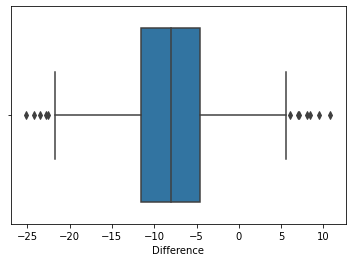

In [317]:
boxplotdata = MasterDF.Difference.sort_values()
sns.boxplot(x=boxplotdata)

In [322]:
MasterDF[MasterDF.Difference < -20]

,Team,Year,NumberOfGames,Wins,Losses,NumberOfSeries,SeriesWins,SeriesLosses,SeriesTies,WinPercent,LossPercent,SeriesWinPercent,SeriesLossPercent,SeriesTiePercent,Difference
52,Atlanta Braves,1988,160,54,106,54,7,36,11,33.75,66.25,12.962963,66.666667,20.37037,-20.787037
216,Boston Red Sox,1911,153,78,75,42,13,15,14,50.980392,49.019608,30.952381,35.714286,33.333333,-20.028011
249,Boston Red Sox,1944,155,78,77,45,13,15,17,50.322581,49.677419,28.888889,33.333333,37.777778,-21.433692
443,Chicago Cubs,1925,154,68,86,47,11,23,13,44.155844,55.844156,23.404255,48.93617,27.659574,-20.751589
467,Chicago Cubs,1949,154,61,93,57,11,30,16,39.61039,60.38961,19.298246,52.631579,28.070175,-20.312144
609,Chicago White Sox,1968,162,67,95,53,11,27,15,41.358025,58.641975,20.754717,50.943396,28.301887,-20.603308
700,Cincinnati Reds,1934,151,52,99,47,6,29,12,34.437086,65.562914,12.765957,61.702128,25.531915,-21.671129
1300,Milwaukee Brewers,1977,162,67,95,56,10,27,19,41.358025,58.641975,17.857143,48.214286,33.928571,-23.500882
1377,Minnesota Twins,1995,144,56,88,46,8,30,8,38.888889,61.111111,17.391304,65.217391,17.391304,-21.497585
1512,New York Mets,1968,162,73,89,54,12,26,16,45.061728,54.938272,22.222222,48.148148,29.62963,-22.839506


In [112]:
workingdf.Home_Team.unique()

array(['Boston Beaneaters', 'Cincinnati Reds', 'New York Giants',
       'St. Louis Cardinals', 'Philadelphia Phillies',
       'Brooklyn Superbas', nan, 'Pittsburgh Pirates', 'Chicago Orphans',
       'Chicago White Sox', 'Detroit Tigers', 'Baltimore Orioles',
       'Philadelphia Athletics', 'Cleveland Blues', 'Washington Senators',
       'Milwaukee Brewers', 'Boston Americans', 'St. Louis Browns',
       'Cleveland Bronchos', 'Chicago Cubs', 'Cleveland Naps',
       'New York Highlanders', 'Boston Doves', 'Boston Red Sox',
       'Boston Rustlers', 'Brooklyn Dodgers', 'Boston Braves',
       'New York Yankees', 'Baltimore Terrapins', 'Brooklyn Robins',
       'Pittsburgh Rebels', 'Kansas City Packers', 'St. Louis Terriers',
       'Chicago Chi-Feds', 'Indianapolis Hoosiers', 'Brooklyn Tip-Tops',
       'Buffalo Buffeds', 'Chicago Whales', 'Newark Pepper',
       'Buffalo Blues', 'Cleveland Indians', 'Boston Bees',
       'Milwaukee Braves', 'Cincinnati Redlegs', 'Kansas City Athlet

In [96]:
currentTeams = ['Cincinnati Reds', 'Brooklyn Superbas', 'Pittsburgh Pirates', 
                'Chicago White Sox', 'Detroit Tigers', 'Baltimore Orioles', 
                'Milwaukee Brewers', 'Chicago Cubs',  'Boston Red Sox', 
                'New York Yankees', 'Cleveland Indians', 'San Francisco Giants', 
                'Los Angeles Dodgers', 'Minnesota Twins', 'New York Mets', 
                'Houston Astros',  'Atlanta Braves', 'Oakland Athletics', 
                'Kansas City Royals', 'San Diego Padres', 'Texas Rangers', 
                'Seattle Mariners', 'Toronto Blue Jays', 'Florida Marlins', 
                'Colorado Rockies',  'Arizona Diamondbacks', 'LA Angels of Anaheim',
                'Washington Nationals', 'Tampa Bay Rays', 'Miami Marlins']

oldTeams = ['Boston Beaneaters', 'New York Giants', 'Philadelphia Phillies',  
            'Chicago Orphans', 'Philadelphia Athletics', 'Cleveland Blues', 
            'Washington Senators', 'Boston Americans', 'St. Louis Browns',
            'Cleveland Bronchos', 'Cleveland Naps', 'New York Highlanders', 
            'Boston Doves', 'Boston Rustlers', 'Brooklyn Dodgers', 
            'Boston Braves', 'Baltimore Terrapins', 'Brooklyn Robins',
            'Pittsburgh Rebels', 'Kansas City Packers', 'St. Louis Terriers',
            'Chicago Chi-Feds', 'Indianapolis Hoosiers', 'Brooklyn Tip-Tops',
            'Buffalo Buffeds', 'Chicago Whales', 'Newark Pepper',
            'Buffalo Blues', 'Boston Bees', 'Milwaukee Braves', 
            'Cincinnati Redlegs', 'Kansas City Athletics', 'Los Angeles Angels', 
            'Houston Colt .45s', 'California Angels', 'Seattle Pilots', 
            'Montreal Expos', 'Anaheim Angels', 'Tampa Bay Devil Rays']

In [97]:
CurrentDF = MasterDF[MasterDF['Team'].isin(currentTeams)]

In [98]:
CurrentDF.size

16173

In [99]:
OldDF = MasterDF[MasterDF['Team'].isin(oldTeams)]

In [100]:
OldDF.Team.unique()

array(['Anaheim Angels', 'Baltimore Terrapins', 'Boston Americans',
       'Boston Beaneaters', 'Boston Bees', 'Boston Braves',
       'Boston Doves', 'Boston Rustlers', 'Brooklyn Dodgers',
       'Brooklyn Robins', 'Brooklyn Tip-Tops', 'Buffalo Blues',
       'Buffalo Buffeds', 'California Angels', 'Chicago Chi-Feds',
       'Chicago Orphans', 'Chicago Whales', 'Cincinnati Redlegs',
       'Cleveland Blues', 'Cleveland Bronchos', 'Cleveland Naps',
       'Houston Colt .45s', 'Indianapolis Hoosiers',
       'Kansas City Athletics', 'Kansas City Packers',
       'Los Angeles Angels', 'Milwaukee Braves', 'Montreal Expos',
       'New York Giants', 'New York Highlanders', 'Newark Pepper',
       'Philadelphia Athletics', 'Philadelphia Phillies',
       'Pittsburgh Rebels', 'Seattle Pilots', 'St. Louis Browns',
       'St. Louis Terriers', 'Tampa Bay Devil Rays',
       'Washington Senators'], dtype=object)

In [101]:
OldDF.size

5697

In [102]:
MasterDF.size

22950

In [103]:
MasterDF.Team.isna().size

2550

In [104]:
5697 + 16173

21870

In [105]:
2550+21870

24420

In [113]:
RockiesDF = pd.DataFrame(columns = ["Team", "Year", "NumberOfSeries", "SeriesWins", "SeriesLosses", "SeriesTies"])
for x in range(1993, 2020):
    currentyear = OneTeamFunction('Colorado Rockies', x)
    df_length = len(RockiesDF)
    RockiesDF.loc[df_length] = currentyear

In [114]:
RockiesDF

,Team,Year,NumberOfSeries,SeriesWins,SeriesLosses,SeriesTies
0,Colorado Rockies,1993,52,17,28,7
1,Colorado Rockies,1994,37,12,20,5
2,Colorado Rockies,1995,48,22,17,9
3,Colorado Rockies,1996,52,23,24,5
4,Colorado Rockies,1997,60,20,22,18
5,Colorado Rockies,1998,55,21,25,9
6,Colorado Rockies,1999,52,20,28,4
7,Colorado Rockies,2000,53,25,26,2
8,Colorado Rockies,2001,52,18,30,4
9,Colorado Rockies,2002,52,19,27,6


In [107]:
MasterDF["WinPercent"] = (100 * MasterDF["Wins"]/MasterDF["NumberOfGames"])
MasterDF["LossPercent"] = (100 * MasterDF["Losses"]/MasterDF["NumberOfGames"])

MasterDF["SeriesWinPercent"] = (100 * MasterDF["SeriesWins"]/MasterDF["NumberOfSeries"])
MasterDF["SeriesLossPercent"] = (100 * MasterDF["SeriesLosses"]/MasterDF["NumberOfSeries"])
MasterDF["SeriesTiePercent"] = (100 * MasterDF["SeriesTies"]/MasterDF["NumberOfSeries"])



In [135]:
MasterDF["Difference"] = (MasterDF["SeriesWinPercent"]-MasterDF["WinPercent"])

<AxesSubplot:xlabel='Difference'>

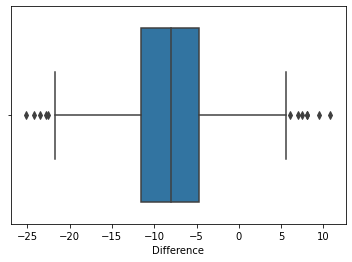

In [150]:
boxplotdata = MasterDF.Difference.sort_values()
sns.boxplot(x=boxplotdata)

In [163]:
OverAchievers = MasterDF[MasterDF['Difference'] > 0]
OverAchievers

,Team,Year,NumberOfGames,Wins,Losses,NumberOfSeries,SeriesWins,SeriesLosses,SeriesTies,WinPercent,LossPercent,SeriesWinPercent,SeriesLossPercent,SeriesTiePercent,SeriesAndWinDifference,Difference
9,Arizona Diamondbacks,1999,162,100,62,52,35,15,2,61.728395,38.271605,67.307692,28.846154,3.846154,5.579297,5.579297
17,Arizona Diamondbacks,2007,162,90,72,52,31,20,1,55.555556,44.444444,59.615385,38.461538,1.923077,4.059829,4.059829
57,Atlanta Braves,1993,162,104,58,52,37,12,3,64.197531,35.802469,71.153846,23.076923,5.769231,6.956315,6.956315
59,Atlanta Braves,1995,158,101,57,55,36,14,5,63.924051,36.075949,65.454545,25.454545,9.090909,1.530495,1.530495
60,Atlanta Braves,1996,162,96,66,52,32,13,7,59.259259,40.740741,61.538462,25.0,13.461538,2.279202,2.279202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Toronto Blue Jays,2006,162,87,75,52,28,18,6,53.703704,46.296296,53.846154,34.615385,11.538462,0.14245,0.14245
2471,Washington Nationals,2012,162,98,64,52,32,12,8,60.493827,39.506173,61.538462,23.076923,15.384615,1.044634,1.044634
2473,Washington Nationals,2014,162,96,66,53,32,15,6,59.259259,40.740741,60.377358,28.301887,11.320755,1.118099,1.118099
2476,Washington Nationals,2017,162,97,65,53,32,15,6,59.876543,40.123457,60.377358,28.301887,11.320755,0.500815,0.500815


In [147]:
MasterDF.iloc[2116]

Team                      San Francisco Giants
Year                                      2003
NumberOfGames                              162
Wins                                       101
Losses                                      61
NumberOfSeries                              53
SeriesWins                                  37
SeriesLosses                                15
SeriesTies                                   1
WinPercent                           62.345679
LossPercent                          37.654321
SeriesWinPercent                     69.811321
SeriesLossPercent                    28.301887
SeriesTiePercent                      1.886792
SeriesAndWinDifference                7.465642
Difference                            7.465642
Name: 2116, dtype: object

TypeError: No loop matching the specified signature and casting was found for ufunc svd_n_s

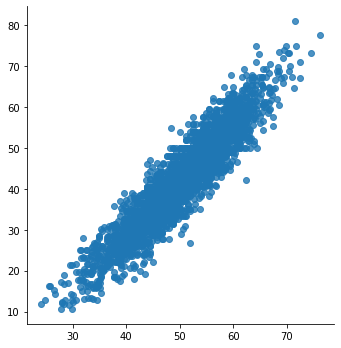

In [49]:
sns.lmplot(x="WinPercent", y="SeriesWinPercent", data=MasterDF)


#asterDF[['WinPercent']] #, 'SeriesWinPercent']

In [117]:
MasterDF["SeriesWinPercent"] = MasterDF["SeriesWinPercent"].astype('float')

In [10]:
MasterDF.sum()

NameError: name 'MasterDF' is not defined

In [164]:
(56610-55800)/((56610+55800)/2)

0.014411529223378704

In [160]:
MasterDF.query("Team == 'Florida Marlins'").sum()

Team                 Florida MarlinsFlorida MarlinsFlorida MarlinsF...
Year                                                             38038
NumberOfSeries                                                     997
SeriesWins                                                         415
SeriesLosses                                                       461
SeriesTies                                                         121
SeriesWinPercent                                            784.429696
SeriesLossPercent                                           889.395078
SeriesTiePercent                                            226.175226
dtype: object

997

In [122]:
MasterDF.SeriesLosses.sum()

55800

In [123]:
SortedDF = MasterDF.sort_values(['SeriesWinPercent'], ascending=[False])
SortedDF = SortedDF.reset_index()
SortedDF.head(10)

,index,Team,Year,NumberOfSeries,SeriesWins,SeriesLosses,SeriesTies,SeriesWinPercent,SeriesLossPercent,SeriesTiePercent
0,1583,New York Yankees,1932,54,41,6,7,75.925926,11.111111,12.962963
1,2157,Seattle Mariners,2001,58,44,8,6,75.862069,13.793103,10.344828
2,1590,New York Yankees,1939,58,43,10,5,74.137931,17.241379,8.62069
3,1900,Pittsburgh Pirates,1902,60,44,8,8,73.333333,13.333333,13.333333
4,1692,Oakland Athletics,1988,56,41,13,2,73.214286,23.214286,3.571429
5,1442,New York Giants,1904,56,41,7,8,73.214286,12.5,14.285714
6,2273,St. Louis Cardinals,1944,52,38,7,7,73.076923,13.461538,13.461538
7,1427,Montreal Expos,1994,37,27,8,2,72.972973,21.621622,5.405405
8,424,Chicago Cubs,1906,55,40,10,5,72.727273,18.181818,9.090909
9,863,Cleveland Indians,1995,54,39,8,7,72.222222,14.814815,12.962963


In [124]:
SortedDF["WonWorldSeries"] = np.nan
SortedDF["WonWorldSeries"].iloc[0] = True
SortedDF["WonWorldSeries"].iloc[1] = False
SortedDF["WonWorldSeries"].iloc[2] = True
SortedDF["WonWorldSeries"].iloc[4] = False
SortedDF["WonWorldSeries"].iloc[6] = True
SortedDF["WonWorldSeries"].iloc[8] = False
SortedDF["WonWorldSeries"].iloc[9] = False
SortedDF["WonWorldSeries"].iloc[10] = True
SortedDF["WonWorldSeries"].iloc[11] = True
SortedDF["WonWorldSeries"].iloc[12] = True

/Users/mackenzyeleroy/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [125]:
SortedDF.head(13)


,index,Team,Year,NumberOfSeries,SeriesWins,SeriesLosses,SeriesTies,SeriesWinPercent,SeriesLossPercent,SeriesTiePercent,WonWorldSeries
0,1583,New York Yankees,1932,54,41,6,7,75.925926,11.111111,12.962963,True
1,2157,Seattle Mariners,2001,58,44,8,6,75.862069,13.793103,10.344828,False
2,1590,New York Yankees,1939,58,43,10,5,74.137931,17.241379,8.62069,True
3,1900,Pittsburgh Pirates,1902,60,44,8,8,73.333333,13.333333,13.333333,NaN
4,1692,Oakland Athletics,1988,56,41,13,2,73.214286,23.214286,3.571429,False
5,1442,New York Giants,1904,56,41,7,8,73.214286,12.5,14.285714,NaN
6,2273,St. Louis Cardinals,1944,52,38,7,7,73.076923,13.461538,13.461538,True
7,1427,Montreal Expos,1994,37,27,8,2,72.972973,21.621622,5.405405,NaN
8,424,Chicago Cubs,1906,55,40,10,5,72.727273,18.181818,9.090909,False
9,863,Cleveland Indians,1995,54,39,8,7,72.222222,14.814815,12.962963,False


In [126]:
SortedDF.tail(20)

,index,Team,Year,NumberOfSeries,SeriesWins,SeriesLosses,SeriesTies,SeriesWinPercent,SeriesLossPercent,SeriesTiePercent,WonWorldSeries
2530,2482,Washington Senators,1904,49,7,34,8,14.285714,69.387755,16.326531,NaN
2531,2186,St. Louis Browns,1911,49,7,33,9,14.285714,67.346939,18.367347,NaN
2532,1816,Philadelphia Phillies,1938,57,8,39,10,14.035088,68.421053,17.54386,NaN
2533,573,Chicago White Sox,1932,45,6,30,9,13.333333,66.666667,20.0,NaN
2534,2485,Washington Senators,1907,45,6,27,12,13.333333,60.0,26.666667,NaN
2535,1402,Montreal Expos,1969,54,7,34,13,12.962963,62.962963,24.074074,NaN
2536,52,Atlanta Braves,1988,54,7,36,11,12.962963,66.666667,20.37037,NaN
2537,196,Boston Braves,1935,47,6,35,6,12.765957,74.468085,12.765957,NaN
2538,153,Baltimore Terrapins,1915,47,6,29,12,12.765957,61.702128,25.531915,NaN
2539,700,Cincinnati Reds,1934,47,6,29,12,12.765957,61.702128,25.531915,NaN


In [127]:
SortedDF.groupby(by=["Team"]).mean().sort_values(by = ["SeriesWinPercent"])

,index,SeriesWinPercent
Team,,
Boston Rustlers,325.0,21.568627
Seattle Pilots,2176.0,24.074074
Cleveland Blues,781.0,25.000000
Kansas City Athletics,1130.0,25.233974
Boston Doves,210.5,25.950835
...,...,...
Indianapolis Hoosiers,1123.0,50.000000
New York Yankees,1617.0,51.133409
Chicago Chi-Feds,420.0,52.830189


In [128]:
TeamRanges = pd.DataFrame(SortedDF.groupby(by=["Team"]).agg({"SeriesWinPercent": ["mean", "min", "max"]}).to_records())

In [129]:
TeamRanges = TeamRanges.rename(columns = {"('SeriesWinPercent', 'mean')": "MeanSeriesWinPercent", "('SeriesWinPercent', 'min')": "MinSeriesWinPercent", "('SeriesWinPercent', 'max')": "MaxSeriesWinPercent" })

In [130]:
TeamRanges["SeriesWinPercentDiff"] = TeamRanges["MaxSeriesWinPercent"] - TeamRanges["MinSeriesWinPercent"]

In [2]:
TeamRanges.sort_values(['MeanSeriesWinPercent'], ascending=[False])

NameError: name 'TeamRanges' is not defined

In [132]:
TeamRanges.sort_values(['MinSeriesWinPercent'], ascending=[False])

,Team,MeanSeriesWinPercent,MinSeriesWinPercent,MaxSeriesWinPercent,SeriesWinPercentDiff
22,Chicago Whales,54.716981,54.716981,54.716981,0.000000
19,Chicago Chi-Feds,52.830189,52.830189,52.830189,0.000000
35,Indianapolis Hoosiers,50.000000,50.000000,50.000000,0.000000
17,Buffalo Buffeds,46.808511,46.808511,46.808511,0.000000
51,Newark Pepper,45.454545,45.454545,45.454545,0.000000
...,...,...,...,...,...
10,Boston Red Sox,43.274455,12.244898,69.387755,57.142857
53,Philadelphia Athletics,39.269376,11.904762,70.212766,58.308004
31,Detroit Tigers,42.131054,11.538462,62.745098,51.206637
54,Philadelphia Phillies,37.448695,10.638298,63.461538,52.823241


In [133]:
TeamRanges.sort_values(['MaxSeriesWinPercent'], ascending=[False])

,Team,MeanSeriesWinPercent,MinSeriesWinPercent,MaxSeriesWinPercent,SeriesWinPercentDiff
50,New York Yankees,51.133409,24.528302,75.925926,51.397624
59,Seattle Mariners,39.731768,16.981132,75.862069,58.880937
55,Pittsburgh Pirates,43.119255,10.526316,73.333333,62.807018
52,Oakland Athletics,46.082211,19.230769,73.214286,53.983516
47,New York Giants,48.133030,23.636364,73.214286,49.577922
...,...,...,...,...,...
36,Kansas City Athletics,25.233974,15.789474,32.142857,16.353383
34,Houston Colt .45s,26.420918,24.074074,30.188679,6.114605
26,Cleveland Blues,25.000000,25.000000,25.000000,0.000000
60,Seattle Pilots,24.074074,24.074074,24.074074,0.000000


In [134]:
TeamRanges.sort_values(['SeriesWinPercentDiff'], ascending=[False]).head(15)

,Team,MeanSeriesWinPercent,MinSeriesWinPercent,MaxSeriesWinPercent,SeriesWinPercentDiff
55,Pittsburgh Pirates,43.119255,10.526316,73.333333,62.807018
46,Montreal Expos,40.567319,12.962963,72.972973,60.010010
59,Seattle Mariners,39.731768,16.981132,75.862069,58.880937
53,Philadelphia Athletics,39.269376,11.904762,70.212766,58.308004
62,St. Louis Cardinals,45.181503,15.909091,73.076923,57.167832
10,Boston Red Sox,43.274455,12.244898,69.387755,57.142857
2,Atlanta Braves,43.733784,12.962963,67.272727,54.309764
52,Oakland Athletics,46.082211,19.230769,73.214286,53.983516
20,Chicago Cubs,41.301420,19.298246,72.727273,53.429027
54,Philadelphia Phillies,37.448695,10.638298,63.461538,52.823241
